In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
infile = "FPR_search_from_nr.txt_paste"

In [4]:
search = pd.read_csv(infile, sep='\t')

In [5]:
search.head(5)

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,names,length
0,1.400000e-229,774.2,34.7,2.200000e-120,415.0,12.0,2.5,2,ETE64565.1,ETE64565.1,879
1,8.100000e-211,712.5,63.7,1.300000e-86,304.0,21.5,3.0,3,EMP41304.1,EMP41304.1,773
2,9.600000e-202,682.6,32.1,3.500000e-117,404.5,14.0,2.0,2,XP_008284099.1,XP_008284099.1,649
3,1.900000e-187,635.6,54.1,4.500000e-94,328.5,26.0,2.0,2,TRY71314.1,TRY71314.1,681
4,1.000000e-176,600.3,54.7,1.000000e-99,347.1,30.2,3.0,3,KPP62370.1,KPP62370.1,637


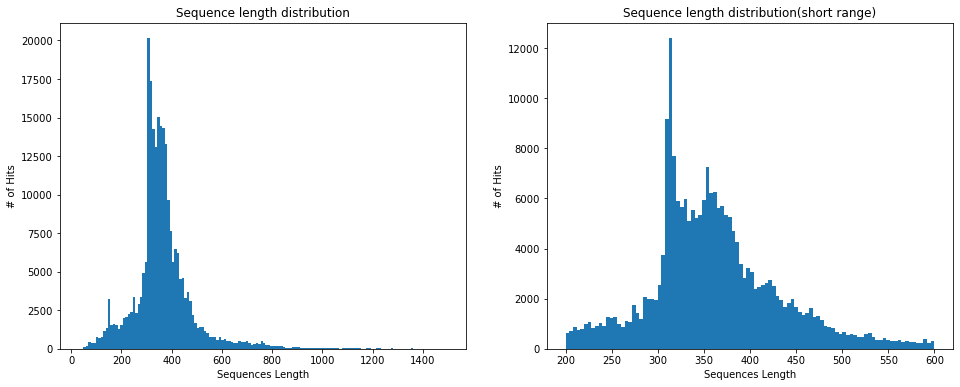

In [6]:
fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.hist(search[np.logical_and(search['length']>=0, search['length']<=1500)]['length'], bins=150)
ax1.set_title("Sequence length distribution")
ax1.set_xlabel("Sequences Length")
ax1.set_ylabel("# of Hits")
ax2 = plt.subplot(122)
ax2.hist(search[np.logical_and(search['length']>=200, search['length']<=600)]['length'], bins=100)
ax2.set_title("Sequence length distribution(short range)")
ax2.set_xlabel("Sequences Length")
ax2.set_ylabel("# of Hits")
plt.savefig("FPR_nr_Sequence_length_distribution.svg", dpi=600, format='svg')
plt.savefig("FPR_nr_Sequence_length_distribution.png", dpi=600, format='png')
plt.show()

In [7]:
search_filter_length = search[np.logical_and(search['length']>=290, search['length']<=500)]

In [8]:
def CountRange(df, name, num=200):
    ser = df[name]
    Range = np.logspace(-num, -1, num)
    X, Y = [], []
    for cut in Range:
        X.append(cut)
        Y.append(sum(ser <= cut))
    return X, Y

In [9]:
X, Y = CountRange(search, "E-value")
X_length, Y_length = CountRange(search_filter_length, "E-value")

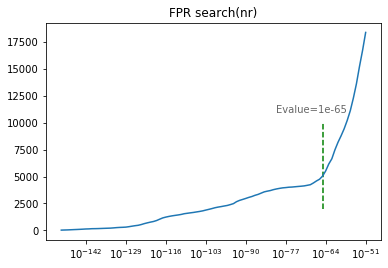

In [10]:
plt.plot(X[50:150], Y[50:150])
plt.xscale('log')
plt.vlines(1e-65, 2000, 10000, colors='g', linestyles='dashed')
plt.title("FPR search(nr)")
plt.text(1e-80, 11000, "Evalue=1e-65", size = 10, alpha = 0.6)
plt.savefig("FPR_search_from_nr.svg", format='svg')
plt.savefig("FPR_search_from_nr.png", dpi=600, format='png')
plt.show()

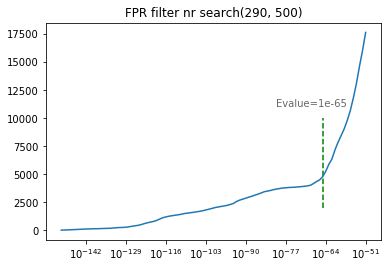

In [11]:
plt.plot(X_length[50:150], Y_length[50:150])
plt.xscale('log')
plt.vlines(1e-65, 2000, 10000, colors='g', linestyles='dashed')
plt.text(1e-80, 11000, "Evalue=1e-65", size = 10, alpha = 0.6)
plt.title("FPR filter nr search(290, 500)")
plt.savefig("FPR_search_from_nr_lengthfilter_290-500.svg", format='svg')
plt.show()

In [12]:
select_names = search_filter_length[search_filter_length['E-value']<= 1e-65]['Sequence'].values

In [13]:
len(select_names)

4768

In [14]:
with open("FPR_search_from_nr_names_select_evalue-65_length290-500.txt", 'w') as outf:
    select_names = [line+'\n' for line in select_names]
    outf.writelines(select_names)

In [15]:
select_evalue = search[search['E-value']<= 1e-65]['Sequence'].values

In [16]:
with open("FPR_search_from_nr_names_select_evalue-65.txt", 'w') as outf:
    select_names = [line+'\n' for line in select_evalue]
    outf.writelines(select_names)